In [1]:
using DrWatson
@quickactivate "Doran_etal_2022"

In [2]:
using CSV, DataFrames
using StatsPlots

In [3]:
pdir = plotsdir("localsweep")
mkpath(pdir)
df = CSV.read(datadir("exp_pro", "localsweep", "metricsSPI.csv"), DataFrame);

In [4]:
pdf = df[:, [:ntaxa, :nfeatures, :SPI_fscore]] |>
    df->unstack(df, :nfeatures, :SPI_fscore) |>
    df->sort(df, :ntaxa) |>
    df->select(df, ["ntaxa", "16", "32","64", "128", "256", "512", "1024"])

,ntaxa,16,32,64,128,256,512,1024
,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,16,0.4,0.5,0.785714,0.857143,0.64,0.64,0.740741
2,32,0.166667,0.48,0.793103,0.847458,0.678571,0.701754,0.896552
3,64,0.057971,0.52,0.592593,0.775862,0.756303,0.819672,0.816667
4,128,0.0746269,0.390805,0.502463,0.833333,0.754237,0.758333,0.844262
5,256,0.0716846,0.423913,0.633621,0.752599,0.779381,0.752033,0.770492
6,512,0.0667904,0.338831,0.595792,0.694093,0.757764,0.790603,0.774127
7,1024,0.0246914,0.346125,0.64949,0.718187,0.720452,0.754198,0.771621


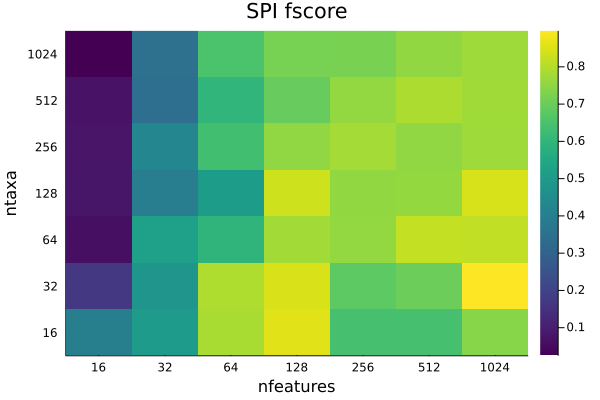

In [5]:
heatmap(Matrix(pdf[!,2:end]), 
    ticks=(1:7, [ "16", "32", "64", "128", "256", "512", "1024"]),
    xlabel="nfeatures",
    ylabel="ntaxa",
    title="SPI fscore",
    c=:viridis)

In [6]:
savefig(joinpath(pdir, "localsweep_fscore.svg"))